In [2]:
import pandas as pd
import requests as r
import yfinance as yf
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
pagina= r.get(url).content
lista_datos = pd.read_html(pagina)
type(lista_datos)
datos_wiki=lista_datos[0]


In [4]:
datos_wiki.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949


In [5]:
df_simbolos=datos_wiki.iloc[:,[0,1,3,4]]

In [6]:
df_simbolos

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [7]:
type(df_simbolos['Symbol'])

pandas.core.series.Series

In [8]:
#df_simbolos['Symbol']=df_simbolos['Symbol'].replace('.','-') 
df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')


/tmp/ipykernel_187304/3270643762.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')
/tmp/ipykernel_187304/3270643762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')


In [9]:
df_simbolos.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [10]:
simbolos= df_simbolos['Symbol'].tolist()

In [11]:

print(simbolos)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [12]:
df_data = yf.download(simbolos,start='2000-01-01',end='2020-12-31',group_by="ticker", threads=3)
df_data



[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- CEG: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1609390800


EXPE                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2005-07-21  48.220001  49.200001  47.840000  48.040001  31.640827  109200.0   
2005-07-22  49.240002  49.799999  47.900002  49.720001  32.747334   56800.0   
2005-07-25  49.799999  49.799999  48.299999  48.480000  31.930630   39600.0   
2005-07-26  48.700001  48.700001  47.500000  48.000000  31.614479  102450.0   
2005-07-27  48.000000  48.240002  47.299999  48.139999  31.706694   98100.0   
...               ...        ...        ...        ...        ...       ...   
2005-07-18        NaN        NaN        NaN        NaN        NaN       NaN   
2005-07-19        NaN        NaN        NaN        NaN        NaN       NaN   
2005-07-20        NaN        NaN        NaN        NaN        NaN       NaN   
2020-12-31        NaN        NaN        NaN        NaN        NaN       NaN   
2001-09-12        NaN        NaN        NaN        NaN        NaN       NaN   

            KHC                 ...        LHX                        \
           Open High Low Close  ...        Low      Close  Adj Close   
Date                            ...                                    
2005-07-21  NaN  NaN NaN   NaN  ...  29.732857  29.950159  21.401529   
2005-07-22  NaN  NaN NaN   NaN  ...  29.572241  29.836784  21.320515   
2005-07-25  NaN  NaN NaN   NaN  ...  29.203768  29.392729  21.003197   
2005-07-26  NaN  NaN NaN   NaN  ...  29.251007  29.921816  21.381258   
2005-07-27  NaN  NaN NaN   NaN  ...  29.902920  30.677656  21.921373   
...         ...  ...  ..   ...  ...        ...        ...        ...   
2005-07-18  NaN  NaN NaN   NaN  ...  30.346975  30.460352  21.766096   
2005-07-19  NaN  NaN NaN   NaN  ...  30.375320  30.517040  21.806597   
2005-07-20  NaN  NaN NaN   NaN  ...  29.676168  30.139120  21.536549   
2020-12-31  NaN  NaN NaN   NaN  ...        NaN        NaN        NaN   
2001-09-12  NaN  NaN NaN   NaN  ...        NaN        NaN        NaN   

                             HON                                              \
               Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2005-07-21   739204.0  36.637993  37.314884  36.237576  36.742863  24.956861   
2005-07-22   472163.0  36.895401  37.143276  36.151772  36.418716  24.736694   
2005-07-25   574090.0  36.418716  36.418716  35.980167  36.056435  24.490616   
2005-07-26  1483489.0  36.056435  36.475918  35.865761  36.266178  24.633085   
2005-07-27   822502.0  36.361515  36.628456  35.999233  36.247108  24.620136   
...               ...        ...        ...        ...        ...        ...   
2005-07-18   524132.0  34.731251  35.255604  34.693115  35.026794  23.791256   
2005-07-19   659187.0  35.179337  35.846695  35.169804  35.846695  24.348158   
2005-07-20  1080017.0  36.228043  36.943069  34.559647  36.924004  25.079903   
2020-12-31        NaN        NaN        NaN        NaN        NaN        NaN   
2001-09-12        NaN        NaN        NaN        NaN        NaN        NaN   

                       
               Volume  
Date                   
2005-07-21  6774498.0  
2005-07-22  3071632.0  
2005-07-25  2565847.0  
2005-07-26  2580636.0  
2005-07-27  2335820.0  
...               ...  
2005-07-18  4483047.0  
2005-07-19  6865648.0  
2005-07-20  9650718.0  
2020-12-31        NaN  
2001-09-12        NaN  

[5285 rows x 3018 columns]

In [15]:

df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()
list_tickers=[]
for i in tickers:
    df_ticker=df_data.loc[:,i]
    df_ticker.reset_index(inplace=True)
    df_ticker=df_ticker.sort_values('Date')
    df_ticker=df_ticker.assign(Ticker=i)
    #Se calcula el Retorno GAP y se agrega esa columna
    df_ticker= df_ticker.assign(GAP_Return=lambda x: np.log(x['Open']/x['Close'].shift(1)).fillna(0))
    #Se calcula el Retorno Intradiario y se agrega esa columna
    df_ticker= df_ticker.assign(Intradaily_Return=lambda x: np.log(x['Open']/x['Close']).fillna(0))
    #Se calcula la variacion y se agrega esa columna
    df_ticker=df_ticker.assign(Variation= lambda x: x['Adj Close'].pct_change())
    #Se calcula la volatibilidad y se agrega esa columna
    df_ticker= df_ticker.assign(Volatility= lambda x: x['Variation'].rolling(250).std()*100*(250)**0.5 )        
    list_tickers.append(df_ticker)

df_global=pd.concat(list_tickers)

df_global=df_global.assign(WeekDay=lambda x:x['Date'].dt.strftime('%A'))    #para conocer el dia de la semana
df_global=df_global.assign(Year_Month=lambda x:x['Date'].dt.strftime('%Y-%m'))      #para conocer el año y mes correspondiente


In [16]:
df_global

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month
3889,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,EXPE,0.000000,0.000000,NaN,NaN,Monday,2000-01
3890,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,EXPE,0.000000,0.000000,NaN,NaN,Tuesday,2000-01
3891,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,EXPE,0.000000,0.000000,NaN,NaN,Wednesday,2000-01
3892,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,EXPE,0.000000,0.000000,NaN,NaN,Thursday,2000-01
3893,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,EXPE,0.000000,0.000000,NaN,NaN,Friday,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2020-12-24,210.529999,210.699997,208.600006,209.529999,203.835938,754900.0,HON,0.002568,0.004761,-0.002191,45.351221,Thursday,2020-12
3886,2020-12-28,211.000000,211.229996,209.380005,209.940002,204.234818,1715700.0,HON,0.006991,0.005036,0.001957,45.350799,Monday,2020-12
3887,2020-12-29,211.399994,211.399994,207.880005,209.130005,203.446838,1527600.0,HON,0.006930,0.010796,-0.003858,45.308016,Tuesday,2020-12
3888,2020-12-30,210.000000,211.589996,209.559998,210.949997,205.217377,1602100.0,HON,0.004151,-0.004514,0.008703,45.298963,Wednesday,2020-12


In [237]:
verificar_inicio_cero=df_global.loc[df_global.Date=='2000-01-03','GAP_Return'].sum()
verificar_inicio_cero

0.0

In [238]:
df_retorno_gaps= pd.DataFrame()

df_retorno_gaps=df_global[['WeekDay','GAP_Return']]
df_retorno_gaps

,WeekDay,GAP_Return
2798,Monday,0.000000
2799,Tuesday,0.000000
2800,Wednesday,0.000000
2801,Thursday,0.000000
2802,Friday,0.000000
...,...,...
2794,Thursday,0.005133
2795,Monday,0.016998
2796,Tuesday,0.004800
2797,Wednesday,0.002987


In [239]:
dia_inversion_gap=df_retorno_gaps.groupby(['WeekDay']).mean()
#dia_inversion.reset_index(inplace=True)
dia_inversion_gap

,GAP_Return
WeekDay,
Friday,0.000155
Monday,0.000028
Thursday,-0.000007
Tuesday,0.000502
Wednesday,0.000097


Text(0.5, 1.0, 'Promedio de Retorno-GAP segun dia de la semana')

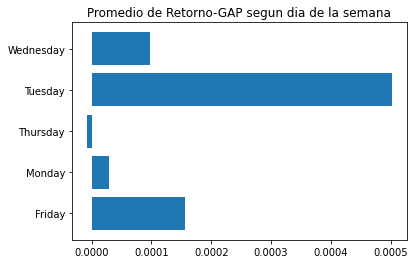

In [240]:
plt.figure()                                #Figura 
x_values1 = dia_inversion_gap.index.tolist()
y_values1 = dia_inversion_gap.GAP_Return.tolist()

plt.barh(x_values1, y_values1)               #El gráfico
plt.title('Promedio de Retorno-GAP segun dia de la semana')              #El título

<Figure size 720x720 with 0 Axes>

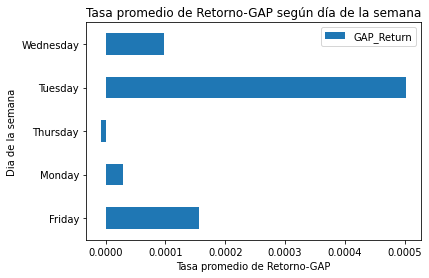

In [241]:
plt.figure(figsize=(10,10))
dia_inversion_gap.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según día de la semana')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Dia de la semana')
plt.show()

In [242]:
df_retorno_intra= pd.DataFrame()
df_retorno_intra=df_global[['WeekDay','Intradaily_Return']]
df_retorno_intra

,WeekDay,Intradaily_Return
2798,Monday,0.000000
2799,Tuesday,0.000000
2800,Wednesday,0.000000
2801,Thursday,0.000000
2802,Friday,0.000000
...,...,...
2794,Thursday,-0.003833
2795,Monday,0.015866
2796,Tuesday,0.011189
2797,Wednesday,-0.021077


In [243]:
dia_inversion_intra=df_retorno_intra.groupby(['WeekDay']).mean()
dia_inversion_intra

,Intradaily_Return
WeekDay,
Friday,-0.000215
Monday,0.000297
Thursday,-0.000456
Tuesday,-0.000232
Wednesday,-0.000206


<Figure size 720x720 with 0 Axes>

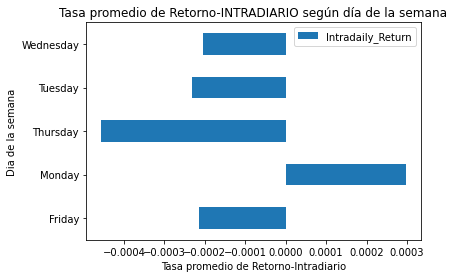

In [283]:
plt.figure(figsize=(10,10))
dia_inversion_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.xlabel('Tasa promedio de Retorno-Intradiario')
plt.ylabel('Dia de la semana')
plt.show()

In [261]:
datos_wiki=datos_wiki.rename({'Symbol': 'Ticker'},axis=1)
datos_wiki


,Ticker,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [264]:

df_global_ind= df_global.merge(datos_wiki, on='Ticker', how='left')
df_global_ind

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,WeekDay,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Monday,Fortinet,reports,Information Technology,Systems Software,"Sunnyvale, California",2018-10-11,1262039.0,2000
1,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Tuesday,Fortinet,reports,Information Technology,Systems Software,"Sunnyvale, California",2018-10-11,1262039.0,2000
2,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Wednesday,Fortinet,reports,Information Technology,Systems Software,"Sunnyvale, California",2018-10-11,1262039.0,2000
3,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Thursday,Fortinet,reports,Information Technology,Systems Software,"Sunnyvale, California",2018-10-11,1262039.0,2000
4,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Friday,Fortinet,reports,Information Technology,Systems Software,"Sunnyvale, California",2018-10-11,1262039.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658350,2020-12-24,70.309998,70.639999,69.760002,70.580002,70.310341,4848500.0,MU,0.005133,-0.003833,Thursday,Micron Technology,reports,Information Technology,Semiconductors,"Boise, Idaho",1994-09-27,723125.0,1978
2658351,2020-12-28,71.790001,72.110001,70.470001,70.660004,70.390030,8345200.0,MU,0.016998,0.015866,Monday,Micron Technology,reports,Information Technology,Semiconductors,"Boise, Idaho",1994-09-27,723125.0,1978
2658352,2020-12-29,71.000000,71.400002,69.139999,70.209999,69.941742,9403400.0,MU,0.004800,0.011189,Tuesday,Micron Technology,reports,Information Technology,Semiconductors,"Boise, Idaho",1994-09-27,723125.0,1978
2658353,2020-12-30,70.419998,72.650002,70.370003,71.919998,71.645210,11620300.0,MU,0.002987,-0.021077,Wednesday,Micron Technology,reports,Information Technology,Semiconductors,"Boise, Idaho",1994-09-27,723125.0,1978


In [266]:
df_emp_r_gaps= pd.DataFrame()

df_emp_r_gaps=df_global_ind[['GICS Sector','GAP_Return']]
df_emp_r_gaps

,GICS Sector,GAP_Return
0,Information Technology,0.000000
1,Information Technology,0.000000
2,Information Technology,0.000000
3,Information Technology,0.000000
4,Information Technology,0.000000
...,...,...
2658350,Information Technology,0.005133
2658351,Information Technology,0.016998
2658352,Information Technology,0.004800
2658353,Information Technology,0.002987


In [286]:
df_emp_r_gaps =df_emp_r_gaps.groupby(['GICS Sector']).mean()
df_emp_r_gaps = df_emp_r_gaps.sort_values('GAP_Return',ascending=True)
df_emp_r_gaps

,GAP_Return
GICS Sector,
Consumer Staples,-0.000089
Utilities,0.000011
Real Estate,0.000054
Financials,0.000116
Industrials,0.000118
Health Care,0.000156
Information Technology,0.000169
Materials,0.000224
Communication Services,0.000226


<Figure size 720x720 with 0 Axes>

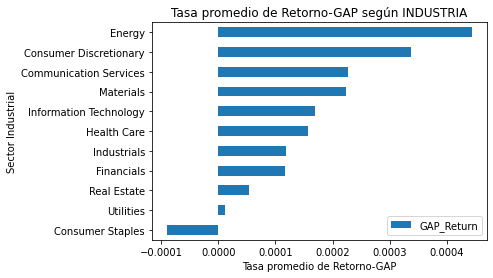

In [287]:
plt.figure(figsize=(10,10))
df_emp_r_gaps.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Sector Industrial')
plt.show()

In [268]:
df_emp_r_intra= pd.DataFrame()

df_emp_r_intra=df_global_ind[['GICS Sector','Intradaily_Return']]
df_emp_r_intra

,GICS Sector,Intradaily_Return
0,Information Technology,0.000000
1,Information Technology,0.000000
2,Information Technology,0.000000
3,Information Technology,0.000000
4,Information Technology,0.000000
...,...,...
2658350,Information Technology,-0.003833
2658351,Information Technology,0.015866
2658352,Information Technology,0.011189
2658353,Information Technology,-0.021077


In [290]:
df_emp_r_intra =df_emp_r_intra.groupby(['GICS Sector']).mean()
df_emp_r_intra = df_emp_r_intra.sort_values('Intradaily_Return',ascending=True)
df_emp_r_intra

,Intradaily_Return
GICS Sector,
Consumer Staples,-0.000354
Health Care,-0.000299
Industrials,-0.000242
Real Estate,-0.000206
Utilities,-0.000200
Information Technology,-0.000196
Financials,-0.000122
Consumer Discretionary,-0.000101
Materials,-0.000050


<Figure size 720x720 with 0 Axes>

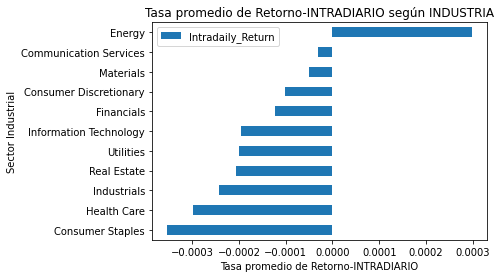

In [291]:
plt.figure(figsize=(10,10))
df_emp_r_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-INTRADIARIO')
plt.ylabel('Sector Industrial')
plt.show()

In [22]:
df_volatibilidades=pd.DataFrame
df_volatibilidades= df_global[['Year_Month','Volatility']]
df_volatibilidades = df_volatibilidades.sort_values('Volatility',ascending=False)
df_volatibilidades

,Year_Month,Volatility
1038,2009-09,214.222117
1037,2009-09,213.994046
1036,2009-09,213.990535
1041,2009-09,213.760616
1040,2009-09,213.593297
...,...,...
4134,2000-12,NaN
4135,2000-12,NaN
4136,2000-12,NaN
4137,2000-12,NaN


In [25]:
df_volatibilidades_por_periodo=df_volatibilidades.groupby(['Year_Month']).mean()
df_volatibilidades_por_periodo = df_volatibilidades_por_periodo.sort_values('Volatility',ascending=False)
df_volatibilidades_por_periodo

,Volatility
Year_Month,
2009-06,70.404259
2009-07,69.984872
2009-05,69.963379
2009-08,69.494806
2009-04,68.581947
...,...
2000-07,NaN
2000-08,NaN
2000-09,NaN


In [32]:
df_volatilidades_altas_periodos=df_volatibilidades_por_periodo.head(15)

In [33]:
df_volatilidades_altas_periodos

,Volatility
Year_Month,
2009-06,70.404259
2009-07,69.984872
2009-05,69.963379
2009-08,69.494806
2009-04,68.581947
2009-09,68.386642
2009-03,66.428753
2009-02,64.056832
2009-10,62.767798


<Figure size 720x720 with 0 Axes>

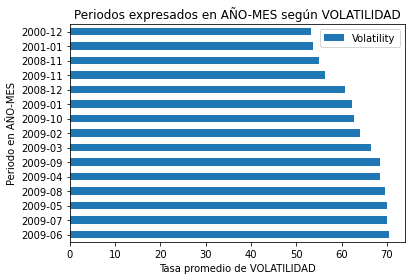

In [34]:
plt.figure(figsize=(10,10))
df_volatilidades_altas_periodos.plot.barh()
plt.title('Periodos expresados en AÑO-MES según VOLATILIDAD')
plt.xlabel('Tasa promedio de VOLATILIDAD')
plt.ylabel('Periodo en AÑO-MES')
plt.show()

In [ ]:
micro = yf.download('MSFT', start='2010-01-01')
micro.reset_index(inplace=True)
micro.head()

In [ ]:
micro.info()

In [ ]:
micro.tail(10)

In [ ]:
micro.info()

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
msft.info

In [ ]:
msft.actions

In [ ]:
msft.calendar

In [ ]:
plt.figure(figsize=(12, 5))
f1 = plt.plot(micro_fil.Date, micro_fil['Adj Close'], c = 'k', ls = '-', lw = 1.5)
f1 = plt.plot(micro_fil.Date, micro_fil['SMA50'], c = 'k', ls = 'solid', lw = 0.5)
plt.xlabel('Tiempo')
plt.ylabel('Activo Microsoft')
plt.legend(['Precio', 'SMA 50'], loc = 'lower right', fontsize = 14)
plt.plot(micro_fil.Date, micro_fil['mPos'], '^',c='g')
plt.plot(micro_fil.Date, micro_fil['mneg'], 'v',c='r')
plt.show()

In [ ]:
retornos_gaps = np.log(aperturas/cierres.shift(1)).fillna(0)

retornos_intra = np.log(cierres/aperturas).fillna(0)

variaciones = activo.cierre_ajustado.pct_change()

volatilidad = activos.variaciones.rolling(250).std()*100*(250)**0.5 # (en este caso se puede utilizar el indice VIX)

In [ ]:
variaciones = micro.Adj_Close.pct_change()